In [1]:
!pip install requests
!pip install beautifulsoup4

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [27]:
base_url = "https://results.eci.gov.in/PcResultGenJune2024/"
url = base_url + "index.htm"
response = requests.get(url)
response.encoding = 'utf-8'

soup = BeautifulSoup(response.text, 'html.parser')
main_data = []
state_list = soup.find('select')  

data_frames = {}
for state in state_list:
    if (str(state).replace('<option value="', "").split('"')[0]).strip() == "":
        continue

    url_state_code = "partywiseresult-{}.htm".format((str(state).replace('<option value="', "").split('"')[0]))
    state_name = (str(state).split('>')[1].split('<')[0])
    state_url = base_url + url_state_code


    state_response = requests.get(state_url)
    state_response.encoding = 'utf-8'
    state_soup = BeautifulSoup(state_response.text, 'html.parser')
    state_table = state_soup.find("table")

    if state_table is None:
        continue

    state_data = []
    for row in state_table.find_all('tr'):
        links = state_soup.find_all('a', href=True)


        cols = [cell.text.strip() for cell in row.find_all(['td', 'th'])]
        if cols[0] in ["Total", "Party"]:
            continue
        del cols[2:4]

        for i, link in enumerate(links):
            if (str(link).split('href')[1].split('>')[0][2:-1].split('-')[0] == 'partywisewinresult'):
                constituency_url =  base_url + (str(link).split('"')[1])


                constituency_response = requests.get(constituency_url)
                constituency_response.encoding = 'utf-8'
                constituency_soup = BeautifulSoup(constituency_response.text, 'html.parser')

                for cons_row in constituency_soup.find_all('tr'):
                    cons_cols = [cons_cell.text.strip() for cons_cell in cons_row.find_all(['td'])]
                    if cons_cols == []: continue
                    main_data.append(cols + cons_cols[1:] + [state_name])
                    
        state_data.append(cols)


In [28]:
header = ['Party Name', 'Total Winning', 'Constituency', 'Winning Candidate', 'Total Votes', 'Margin', 'State']

linked_df = pd.DataFrame(main_data)

linked_df.to_csv('Results.csv', header=header)

# Visualizations

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
 #Convert numerical columns to integers
import pandas as pd

# Load data into a DataFrame
df = pd.read_csv('Results.csv')

In [31]:
df.head()

,Unnamed: 0,Party Name,Total Winning,Constituency,Winning Candidate,Total Votes,Margin,State
0,0,Bharatiya Janata Party - BJP,1,Andaman & Nicobar Islands(1),BISHNU PADA RAY,102436,24396,Andaman &amp; Nicobar Islands
1,1,Telugu Desam - TDP,16,Srikakulam(2),KINJARAPU RAMMOHAN NAIDU,754328,327901,Andhra Pradesh
2,2,Telugu Desam - TDP,16,Vizianagaram(3),APPALANAIDU KALISETTI,743113,249351,Andhra Pradesh
3,3,Telugu Desam - TDP,16,Visakhapatnam(4),SRIBHARAT MATHUKUMILI,907467,504247,Andhra Pradesh
4,4,Telugu Desam - TDP,16,Amalapuram (SC)(7),G M HARISH (BALAYOGI),796981,342196,Andhra Pradesh


In [32]:
df.tail()

,Unnamed: 0,Party Name,Total Winning,Constituency,Winning Candidate,Total Votes,Margin,State
2396,2396,Indian National Congress - INC,1,Tamluk(30),ABHIJIT GANGOPADHYAY,765584,77733,West Bengal
2397,2397,Indian National Congress - INC,1,Kanthi(31),ADHIKARI SOUMENDU,763195,47764,West Bengal
2398,2398,Indian National Congress - INC,1,Purulia(35),JYOTIRMAY SINGH MAHATO,578489,17079,West Bengal
2399,2399,Indian National Congress - INC,1,Bishnupur(37),KHAN SAUMITRA,680130,5567,West Bengal
2400,2400,Indian National Congress - INC,1,Maldaha Dakshin(8),ISHA KHAN CHOUDHURY,572395,128368,West Bengal


In [33]:
df.describe()

,Unnamed: 0,Total Winning
count,2401.000000,2401.000000
mean,1200.000000,7.996252
std,693.253321,9.802274
min,0.000000,1.000000
25%,600.000000,1.000000
50%,1200.000000,3.000000
75%,1800.000000,9.000000
max,2400.000000,37.000000


In [34]:
print(df.columns)

Index(['Unnamed: 0', 'Party Name', 'Total Winning', 'Constituency',
       'Winning Candidate', 'Total Votes', 'Margin', 'State'],
      dtype='object')


In [35]:
# Convert 'Total Votes' to numeric
df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')

# Insight 1

# Seats won by each Party

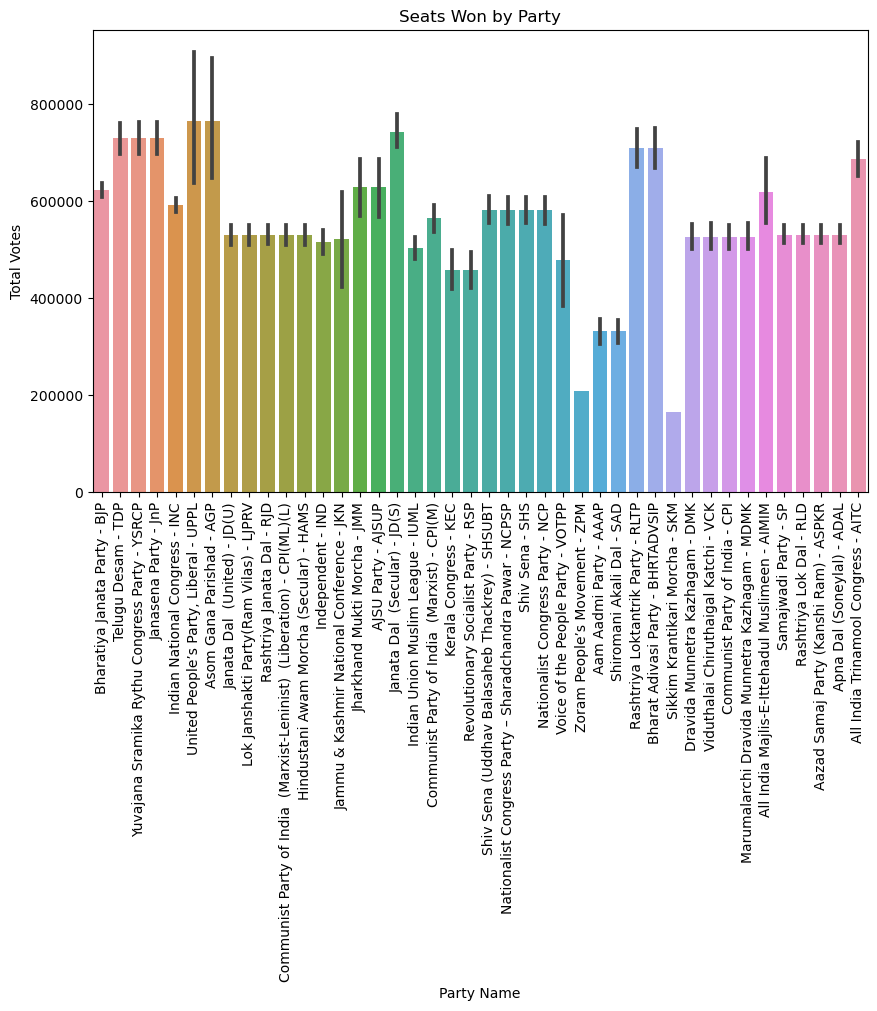

In [36]:
# Visualization: Bar chart for seats won by each party
plt.figure(figsize=(10, 6))
sns.barplot(x='Party Name', y='Total Votes', data=df)
plt.title('Seats Won by Party')
plt.xticks(rotation=90)
plt.show()

In [37]:
df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')

In [38]:
df.dropna(subset=['Total Votes'], inplace=True)

# 2

# Total winning by frequency

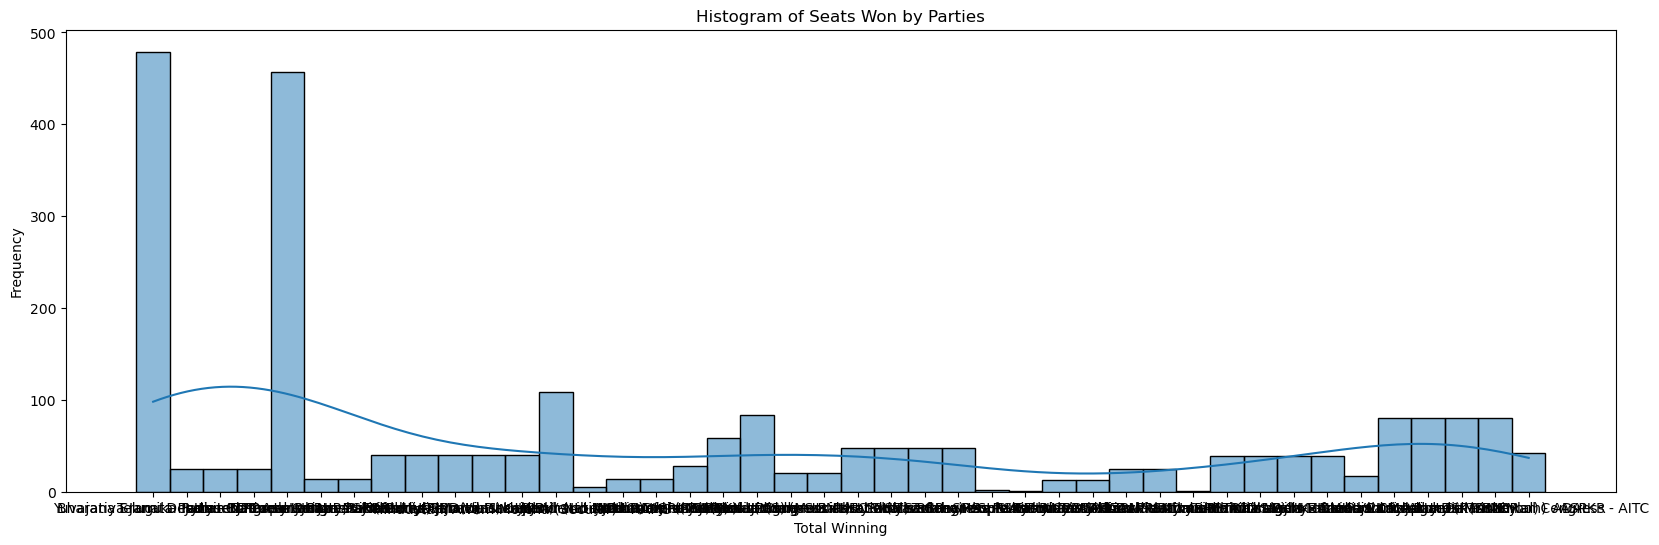

In [39]:
plt.figure(figsize=(20, 6))
sns.histplot(df['Party Name'], bins=20, kde=True)
plt.title('Histogram of Seats Won by Parties')
plt.xlabel('Total Winning')
plt.ylabel('Frequency')
plt.show()

# 3
# Seats won in Andhra Pradesh

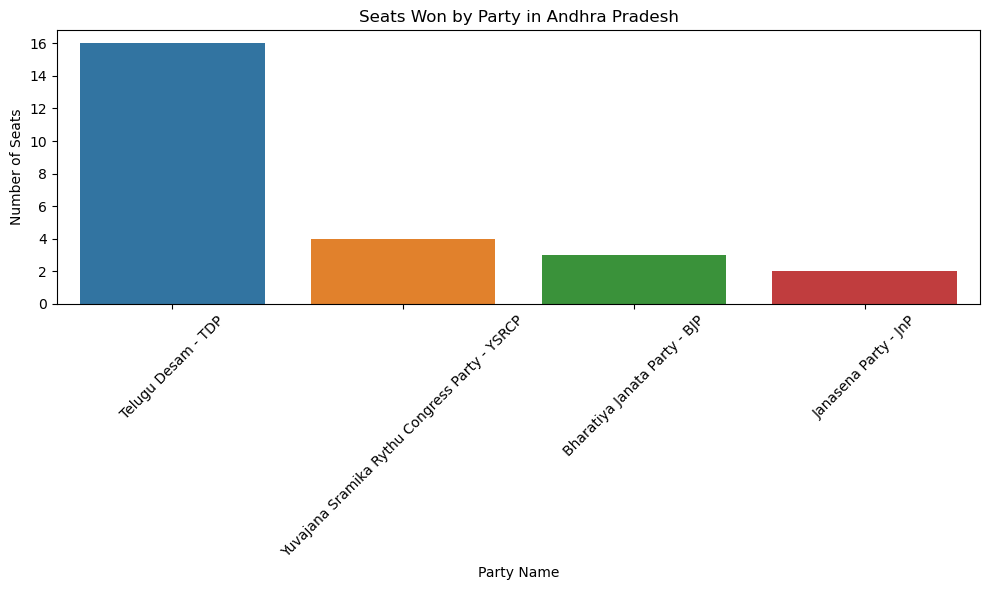

In [40]:
df_ap = df[df['State'] == 'Andhra Pradesh']

# Visualization: Bar chart for seats won by each party in Andhra Pradesh
plt.figure(figsize=(10, 6))
sns.barplot(x='Party Name', y='Total Winning', data=df_ap)
plt.title('Seats Won by Party in Andhra Pradesh')
plt.xlabel('Party Name')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4
# Top 20 candidates with largest votes

In [41]:
top_candidates = df.sort_values(by='Total Votes', ascending=False).head(20)
print("Top Candidates by Votes Received:")
print(top_candidates[['Winning Candidate', 'Total Votes']])

Top Candidates by Votes Received:
          Winning Candidate  Total Votes
154         RAKIBUL HUSSAIN    1471885.0
112         RAKIBUL HUSSAIN    1471885.0
140         RAKIBUL HUSSAIN    1471885.0
126         RAKIBUL HUSSAIN    1471885.0
888         SHANKAR LALWANI    1226751.0
880   SHIVRAJ SINGH CHOUHAN    1116460.0
697        DR C N MANJUNATH    1079002.0
725        DR C N MANJUNATH    1079002.0
669        DR C N MANJUNATH    1079002.0
497       BRIJMOHAN AGRAWAL    1050351.0
486       BRIJMOHAN AGRAWAL    1050351.0
2286      ABHISHEK BANERJEE    1048230.0
2328      ABHISHEK BANERJEE    1048230.0
2370      ABHISHEK BANERJEE    1048230.0
533               C R PATIL    1031065.0
559               C R PATIL    1031065.0
540               AMIT SHAH    1010972.0
514               AMIT SHAH    1010972.0
1741        EATALA RAJENDER     991042.0
1775        EATALA RAJENDER     991042.0


# 5
# Seates won by 20 parties and others

C:\Users\pujaj\AppData\Local\Temp\ipykernel_33484\3357468673.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = top20.append({'Party': 'Others', 'Total Votes': others}, ignore_index=True)


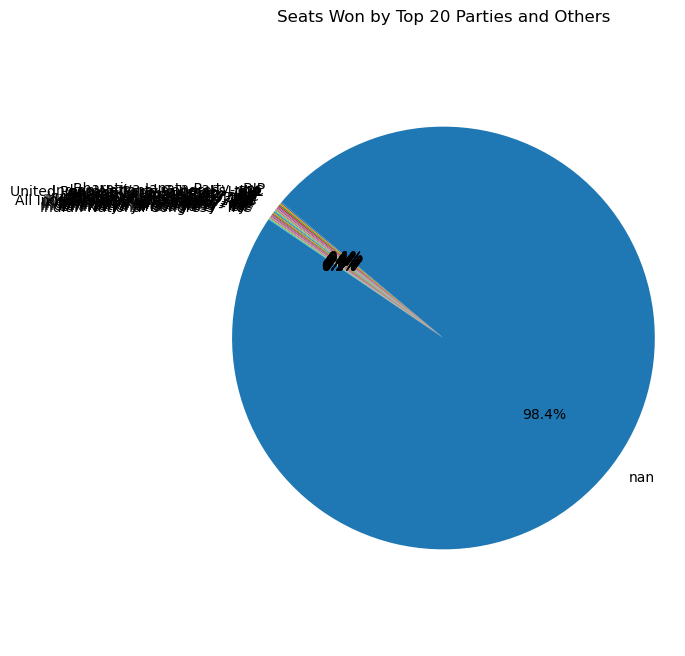

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns like 'Total Votes' and 'Party'

# Calculate top 10 parties by Total Votes
top20 = df.nlargest(20, 'Total Votes')

# Calculate 'others' category
others = df['Total Votes'].sum() - top20['Total Votes'].sum()

# Append 'others' to top 20 parties
combined_data = top20.append({'Party': 'Others', 'Total Votes': others}, ignore_index=True)

# Drop any rows with NaN in 'Total Votes' column
combined_data.dropna(subset=['Total Votes'], inplace=True)

# Plot the pie chart
plt.figure(figsize=(6, 8))
plt.pie(combined_data['Total Votes'], labels=combined_data['Party Name'], autopct='%1.1f%%', startangle=140)
plt.title('Seats Won by Top 20 Parties and Others')
plt.axis('equal')
plt.show()


# 6
# Trends in election

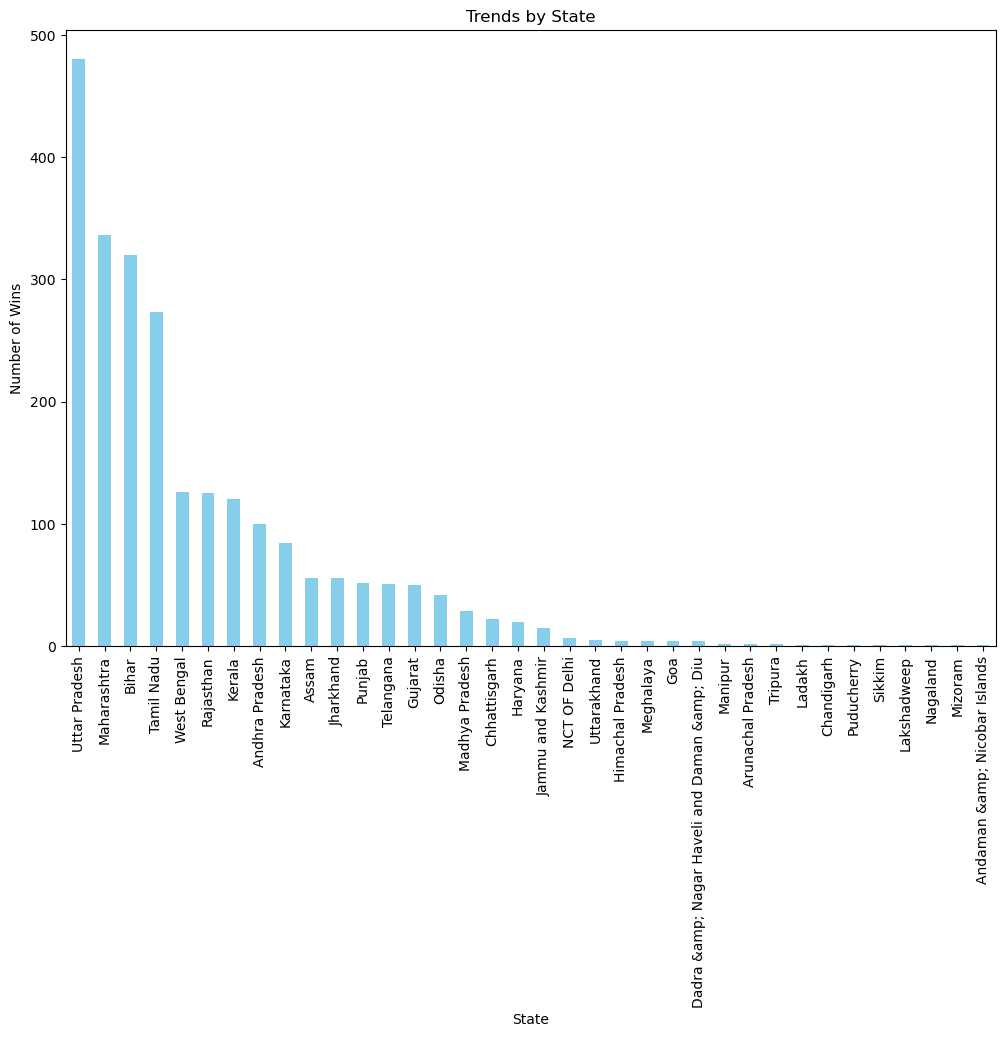

In [43]:
trends = df.groupby('State').size().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
trends.plot(kind='bar', color='skyblue')
plt.title('Trends by State')
plt.xlabel('State')
plt.ylabel('Number of Wins')
plt.show()

# 7
# Histogram of Total Votes

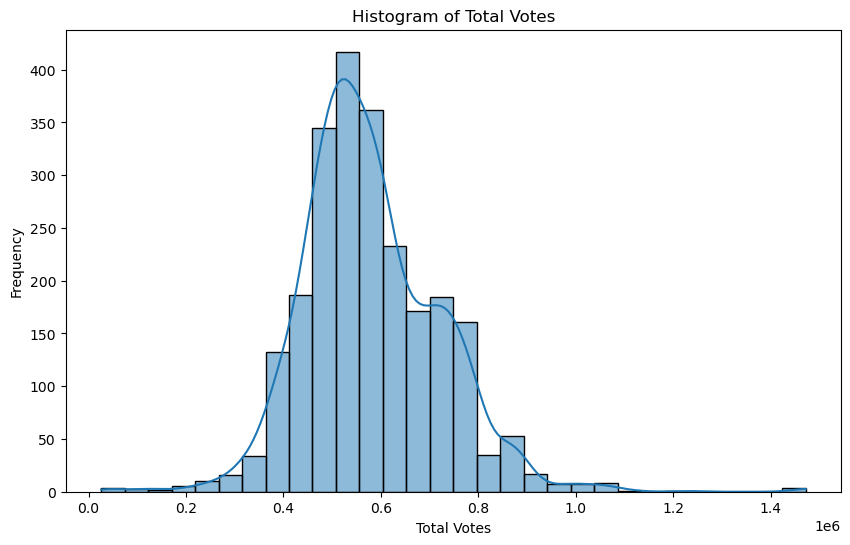

In [44]:
# Convert 'Total Votes' to numeric after removing commas
df['Total Votes'] = pd.to_numeric(df['Total Votes'].astype(str).str.replace(',', ''), errors='coerce')

# Convert 'Margin' to numeric after removing commas
df['Margin'] = pd.to_numeric(df['Margin'].astype(str).str.replace(',', ''), errors='coerce')

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Votes'].dropna(), bins=30, kde=True)  # Drop NaN values before plotting
plt.title('Histogram of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.show()

# 8
# winning distribution of candidates

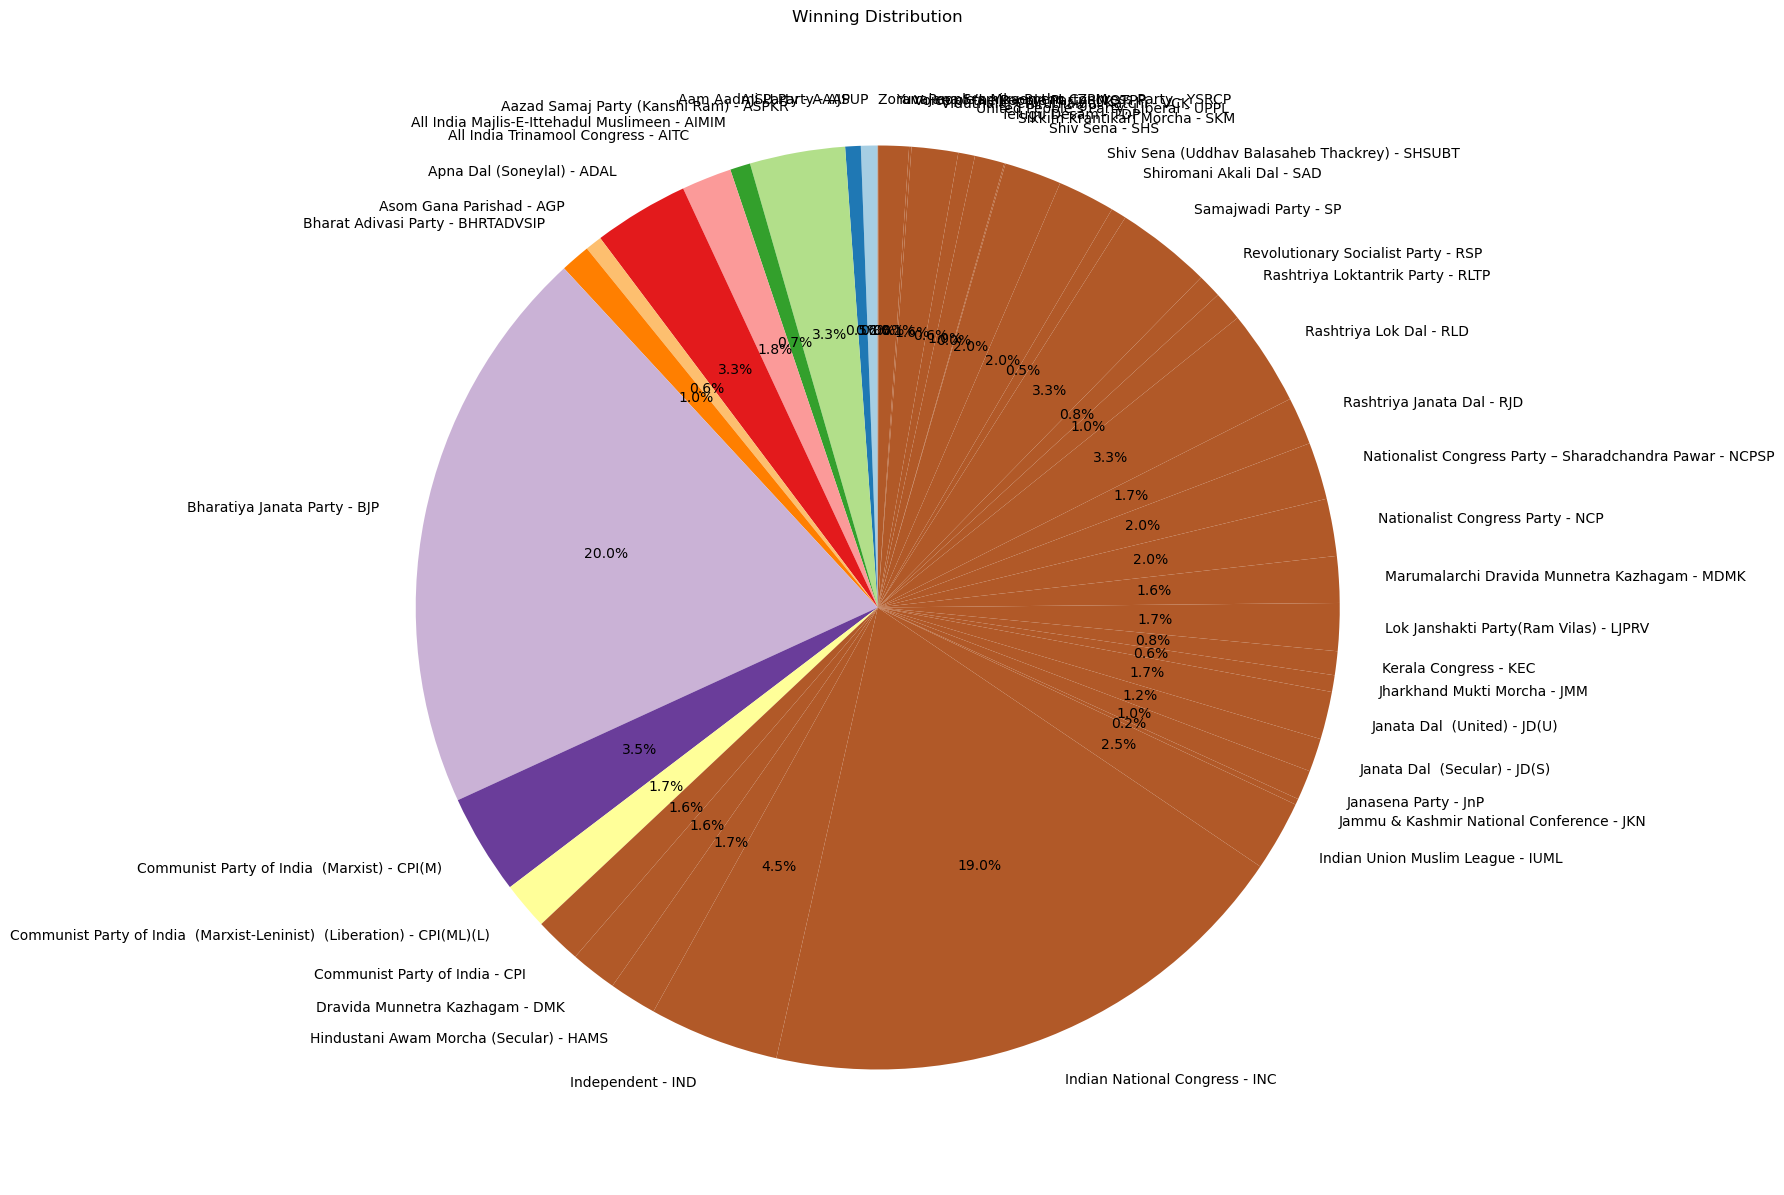

In [45]:
import numpy as np
wins = df.groupby('Party Name').size()
plt.figure(figsize=(30, 15))
wins.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(np.arange(len(wins))), startangle=90)
plt.title('Winning Distribution')
plt.ylabel('')  
plt.show()

# 9
# Contituencies won by each parties

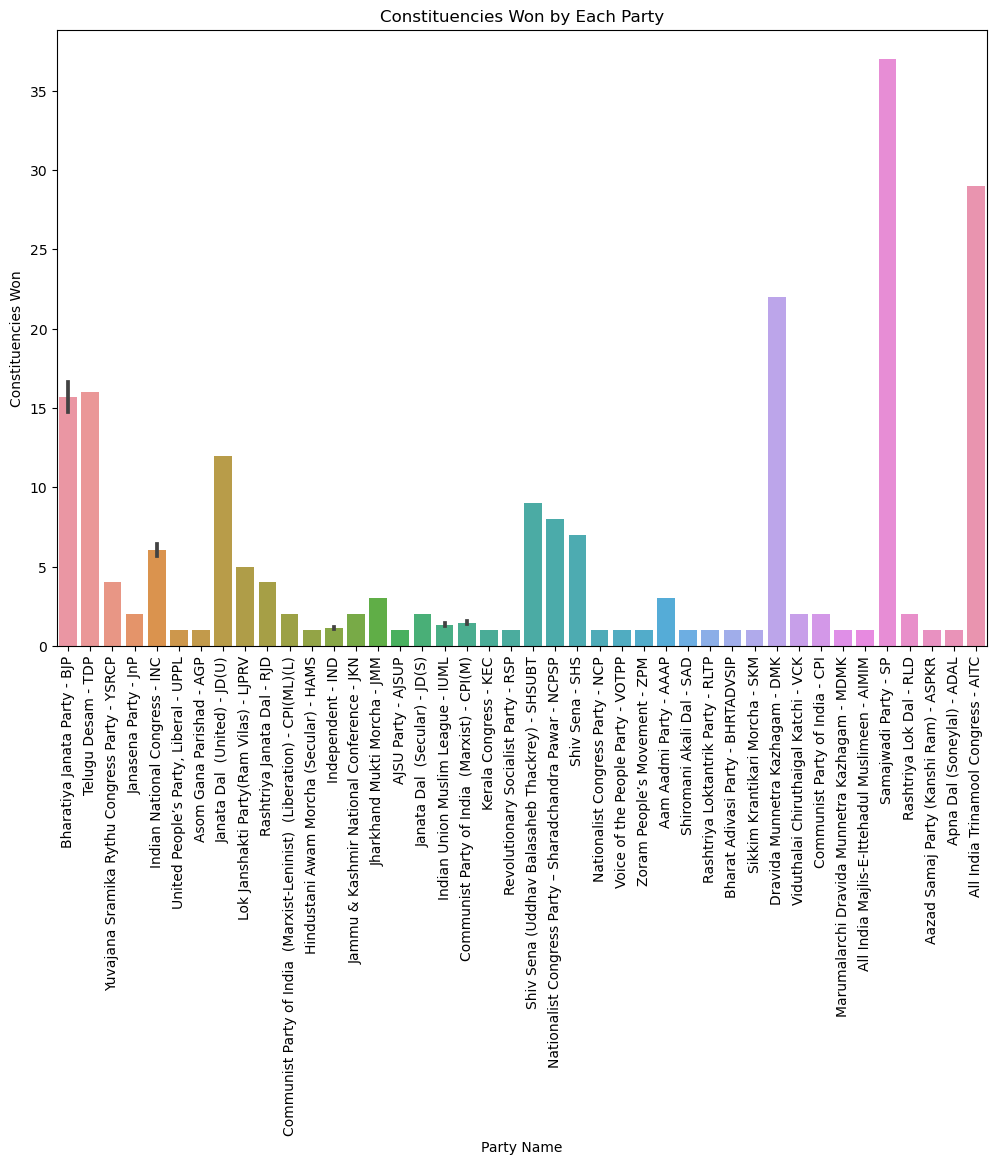

In [46]:
df['Total Winning'] = pd.to_numeric(df['Total Winning'], errors='coerce')
# bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Party Name', y='Total Winning', data=df)
plt.title('Constituencies Won by Each Party')
plt.xlabel('Party Name')
plt.ylabel('Constituencies Won')
plt.xticks(rotation=90)
plt.show()



# 10
# Heatmap of top 20 parties and others

C:\Users\pujaj\AppData\Local\Temp\ipykernel_33484\2474003852.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = top20.append({'Party': 'Others', 'Total Votes': others_share}, ignore_index=True)


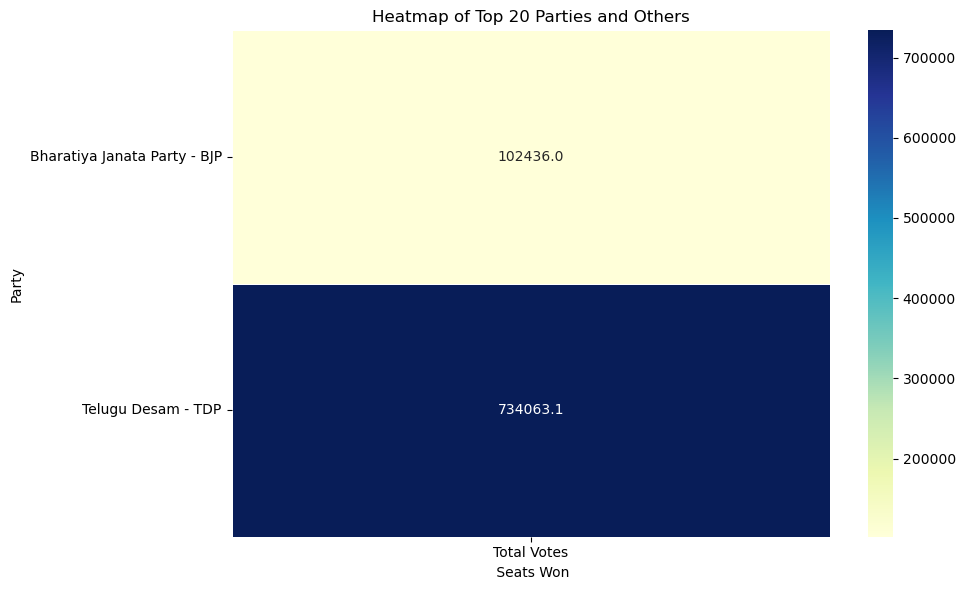

In [47]:
top20 = df.head(20)

others_share = df.iloc[20:]['Total Votes'].sum()


plot_data = top20.append({'Party': 'Others', 'Total Votes': others_share}, ignore_index=True)

heatmap_data = plot_data.pivot_table(index='Party Name', values='Total Votes')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Heatmap of Top 20 Parties and Others')
plt.xlabel(' Seats Won')
plt.ylabel('Party')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()